In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import *
from keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_path = '/kaggle/input/covid19-image-dataset/Covid19-dataset/train'
test_path = '/kaggle/input/covid19-image-dataset/Covid19-dataset/test'

In [5]:
img_classes = os.listdir(train_path)
print(img_classes)

['Normal', 'Viral Pneumonia', 'Covid']


In [17]:
len(img_classes)

3

In [7]:
def plot_frist_image_from_each_class(path):
    
    img_classes = os.listdir(path)
    plt.figure(figsize = (12,12))

    for i, category in enumerate(img_classes):
    
        image_path = path + '/' + category
        images_in_folder = os.listdir(image_path)
        
        first_img = images_in_folder[0]
        first_img_path = image_path + '/' + first_img
        
        
        img = image.load_img(first_img_path)
        img_array = image.img_to_array(img)/255
        
        
        plt.subplot(1,len(img_classes),i +1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
    plt.show()

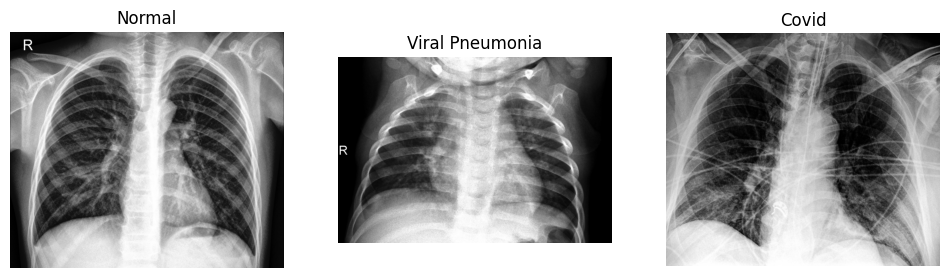

In [8]:
plot_frist_image_from_each_class(train_path)

In [19]:
# def add_padding(image):
#     return tf.image.resize_with_corp_or_pad( image, target_height = 250, target_width=250)

In [41]:
train_gen = ImageDataGenerator(
    # preprocessing_function = add_padding,
    rescale =1/255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    #fill_mode = 'nearst'
)

In [42]:
test_gen = ImageDataGenerator(rescale =1/255)

In [43]:
train_data = train_gen.flow_from_directory(train_path,
                                          target_size = (224,224),
                                          batch_size= 32,
                                          class_mode = 'categorical')

Found 251 images belonging to 3 classes.


In [44]:
test_data = test_gen.flow_from_directory(test_path,
                                          target_size = (224,224),
                                          batch_size= 1,
                                          class_mode = 'categorical')

Found 66 images belonging to 3 classes.


In [45]:
model = Sequential()

###conv-------------------------------
model.add(Conv2D(filters = 32, kernel_size = 3,padding = 'same',
                    activation = 'relu',input_shape = [224,224,3] ))

#add MaxPooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = 3,padding = 'same',
                    activation = 'relu'))
model.add(MaxPooling2D())


model.add(Conv2D(filters = 128, kernel_size = 3, 
                    activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())


#### NN -------------------------------
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))


model.add(Dense(3, activation = 'softmax'))


In [46]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 54, 54, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 27, 27, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      11,944,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,054,211 (45.98 MB)

 Trainable params: 12,054,211 (45.98 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
#cmpile Model
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
            metrics = ['accuracy'] )

In [48]:
num_ep = 5

In [49]:
model_history = model.fit(train_data, epochs = num_ep, validation_data = test_data)

Epoch 1/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 762ms/step - accuracy: 0.3724 - loss: 1.3904 - val_accuracy: 0.5152 - val_loss: 1.0791
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - accuracy: 0.4821 - loss: 1.0596 - val_accuracy: 0.6364 - val_loss: 0.9167
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - accuracy: 0.6859 - loss: 0.8168 - val_accuracy: 0.6818 - val_loss: 0.6159
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - accuracy: 0.7164 - loss: 0.6718 - val_accuracy: 0.6818 - val_loss: 0.8067
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - accuracy: 0.7784 - loss: 0.4817 - val_accuracy: 0.6061 - val_loss: 1.0609


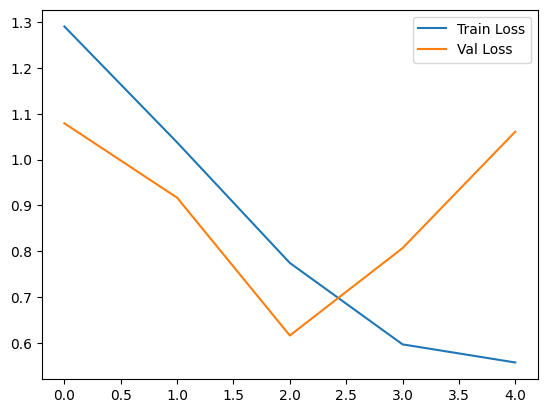

In [50]:
plt.plot(model_history.history['loss'], label = 'Train Loss')
plt.plot(model_history.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.show()

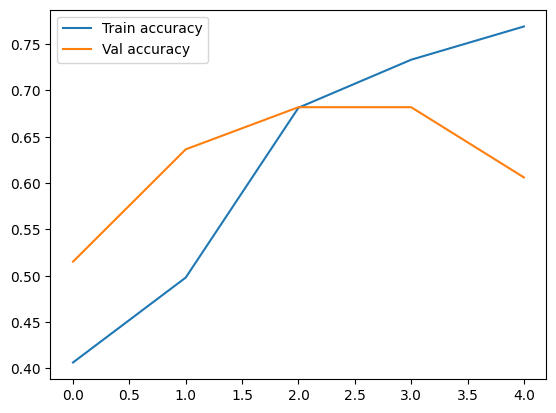

In [51]:
plt.plot(model_history.history['accuracy'], label = 'Train accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'Val accuracy')
plt.legend()
plt.show()